# DAT210x - Programming with Python for DS

## Module5- Lab5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot') # Look Pretty

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

C:\Users\alloq\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### A Convenience Function

In [2]:
def plotDecisionBoundary(model, X, y):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    padding = 0.6
    resolution = 0.0025
    colors = ['royalblue','forestgreen','ghostwhite']

    # Calculate the boundaris
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # Create a 2D Grid Matrix. The values stored in the matrix
    # are the predictions of the class at at said location
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

    # What class does the classifier say?
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour map
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.terrain)

    # Plot the test original points as well...
    for label in range(len(np.unique(y))):
        indices = np.where(y == label)
        plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], label=str(label), alpha=0.8)

    p = model.get_params()
    plt.axis('tight')
    plt.title('K = ' + str(p['n_neighbors']))

### The Assignment

Load up the dataset into a variable called `X`. Check `.head` and `dtypes` to make sure you're loading your data properly--don't fail on the 1st step!

In [3]:
# .. your code here ..
X = pd.read_csv('Datasets/Wheat.data')
X.head()
#X.dtypes

,id,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
0,0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


Copy the `wheat_type` series slice out of `X`, and into a series called `y`. Then drop the original `wheat_type` column from the `X`:

In [4]:
# .. your code here ..
y = X.wheat_type
y.head()

0    kama
1    kama
2    kama
3    kama
4    kama
Name: wheat_type, dtype: object

In [5]:
X = X.drop(['wheat_type', 'id'], axis = 1)
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
area           210 non-null float64
perimeter      210 non-null float64
compactness    207 non-null float64
length         210 non-null float64
width          209 non-null float64
asymmetry      210 non-null float64
groove         206 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


Do a quick, "ordinal" conversion of `y`. In actuality our classification isn't ordinal, but just as an experiment...

In [6]:
# .. your code here ..
y = y.astype('category').cat.codes


Do some basic nan munging. Fill each row's nans with the mean of the feature:

In [7]:
# .. your code here ..
X = X.fillna(X.mean())
X.info()
X.isnull().sum()
y.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
area           210 non-null float64
perimeter      210 non-null float64
compactness    210 non-null float64
length         210 non-null float64
width          210 non-null float64
asymmetry      210 non-null float64
groove         210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


0

In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
dtype: int8

Split `X` into training and testing data sets using `train_test_split()`. Use `0.33` test size, and use `random_state=1`. This is important so that your answers are verifiable. In the real world, you wouldn't specify a random_state:

In [9]:
# .. your code here ..
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

Create an instance of SKLearn's Normalizer class and then train it using its .fit() method against your _training_ data. The reason you only fit against your training data is because in a real-world situation, you'll only have your training data to train with! In this lab setting, you have both train+test data; but in the wild, you'll only have your training data, and then unlabeled data you want to apply your models to.

In [10]:
# .. your code here ..
normalize = Normalizer()
normalize.fit(X_train)

Normalizer(copy=True, norm='l2')

With your trained pre-processor, transform both your training AND testing data. Any testing data has to be transformed with your preprocessor that has ben fit against your training data, so that it exist in the same feature-space as the original data used to train your models.

In [11]:
# .. your code here ..
X_train_trans = normalize.transform(X_train)
X_test_trans = normalize.transform(X_test)

Just like your preprocessing transformation, create a PCA transformation as well. Fit it against your training data, and then project your training and testing features into PCA space using the PCA model's `.transform()` method. This has to be done because the only way to visualize the decision boundary in 2D would be if your KNN algo ran in 2D as well:

In [12]:
# .. your code here ..
pca = PCA(n_components = 2)
pca.fit(X_train_trans)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

Create and train a KNeighborsClassifier. Start with `K=9` neighbors. Be sure train your classifier against the pre-processed, PCA- transformed training data above! You do not, of course, need to transform your labels.

In [53]:
# .. your code here ..
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

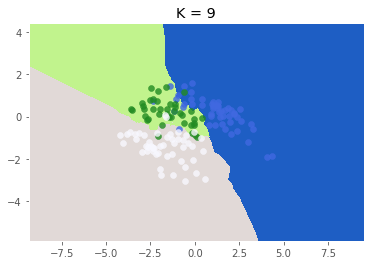

In [14]:
# I hope your KNeighbors classifier model from earlier was named 'knn'
# If not, adjust the following line:
plotDecisionBoundary(knn, X_train, y_train)

Display the accuracy score of your test data/labels, computed by your KNeighbors model. You do NOT have to run `.predict` before calling `.score`, since `.score` will take care of running your predictions for you automatically.

In [54]:
# .. your code here ..
score = knn.score(X_test, y_test)
score


0.8714285714285714

### Bonus

Instead of the ordinal conversion, try and get this assignment working with a proper Pandas get_dummies for feature encoding. You might have to update some of the `plotDecisionBoundary()` code.

In [16]:
plt.show()

In [55]:
#Questions
#1. What is accuracy score of your KNeighbors Classifier when K=9 (Enter as a decimal)?
#Answer: 0.8857142857142857

#2. Decrease K by 1 and record the new accuracy score. Keep doing this until you get down to, and including, 
# K=1. Conparing the scores you saw:
#Answer: 
#K = 9, score = 0.8857142857142857
#K = 8, score = 0.8571428571428571
#K = 7, score = 0.8714285714285714
#K = 6, score = 0.8142857142857143
#K = 5, score = 0.8571428571428571
#K = 4, score = 0.8428571428571429
#K = 3, score = 0.8571428571428571
#K = 2, score = 0.8142857142857143
#K = 1, score = 0.8714285714285714
